# Learning goals: 
 - Data Preprocessing: Data Integration


### Import Required modules

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Example 1
We have two data sources. The first one is treatment.csv. Each row in this dataset shows the GPS coordinates of 128 irrigation systems stationed throughout a field. Each row also shows the total amount of water that the station has used for watering the field throughout the season in a thousand gallons. 

The second data is yield data (Yeild.csv). The amount of harvest collected from a small piece of the same field is recorded. The GPS location for the center of each piece and also the amount of crops harvested from it is also recorded. 

We would like to see if the amount of irrigation influences the harvest amount.


In [3]:
treatment_df = pd.read_csv('Treatment.csv')
treatment_df

,longitude,latitude,water
0,38.074847,-121.701356,2.020364
1,38.074847,-121.700627,2.023396
2,38.074847,-121.699897,2.046829
3,38.074847,-121.699168,2.004052
4,38.074847,-121.698438,2.045074
...,...,...,...
123,38.077272,-121.699168,2.507324
124,38.077272,-121.698438,2.306461
125,38.077272,-121.697709,2.602827
126,38.077272,-121.696979,2.510430


In [4]:
yeild_df = pd.read_csv('Yeild.csv')
yeild_df

,longitude,latitude,harvest
0,38.074847,-121.701356,557.540768
1,38.074847,-121.701180,525.692767
2,38.074847,-121.701004,543.489822
3,38.074847,-121.700828,543.356496
4,38.074847,-121.700652,547.939719
...,...,...,...
1795,38.077272,-121.696954,3595.811304
1796,38.077272,-121.696778,1530.069486
1797,38.077272,-121.696602,1596.053265
1798,38.077272,-121.696426,1330.986689


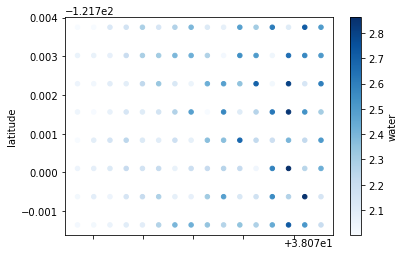

In [5]:
treatment_df.plot(kind="scatter", x="longitude", y="latitude", c='water', cmap='Blues')
plt.show()

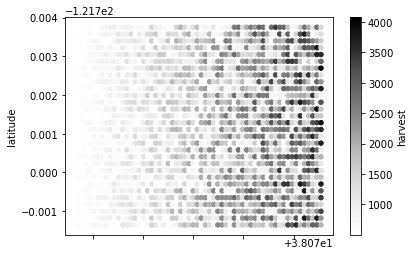

In [6]:
yeild_df.plot(kind="scatter", x="longitude", y="latitude", c='harvest')

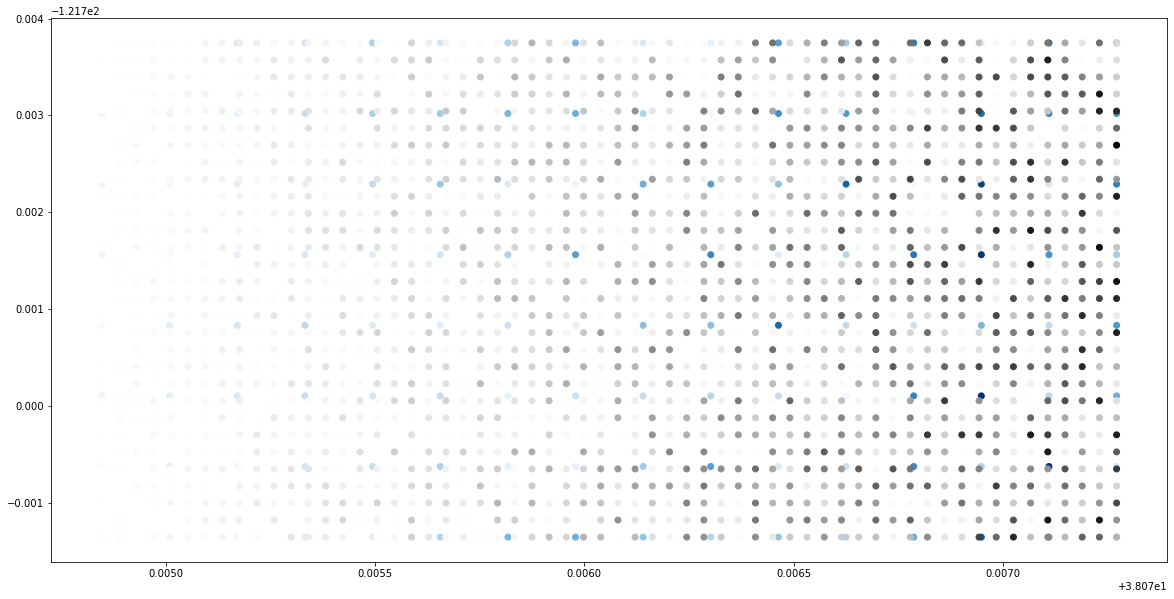

In [7]:
plt.figure(figsize=(20,10))
plt.scatter(treatment_df.longitude,treatment_df.latitude,c=treatment_df.water,cmap='Blues')
plt.scatter(yeild_df.longitude,yeild_df.latitude,c=yeild_df.harvest,cmap='Greys')
plt.show()

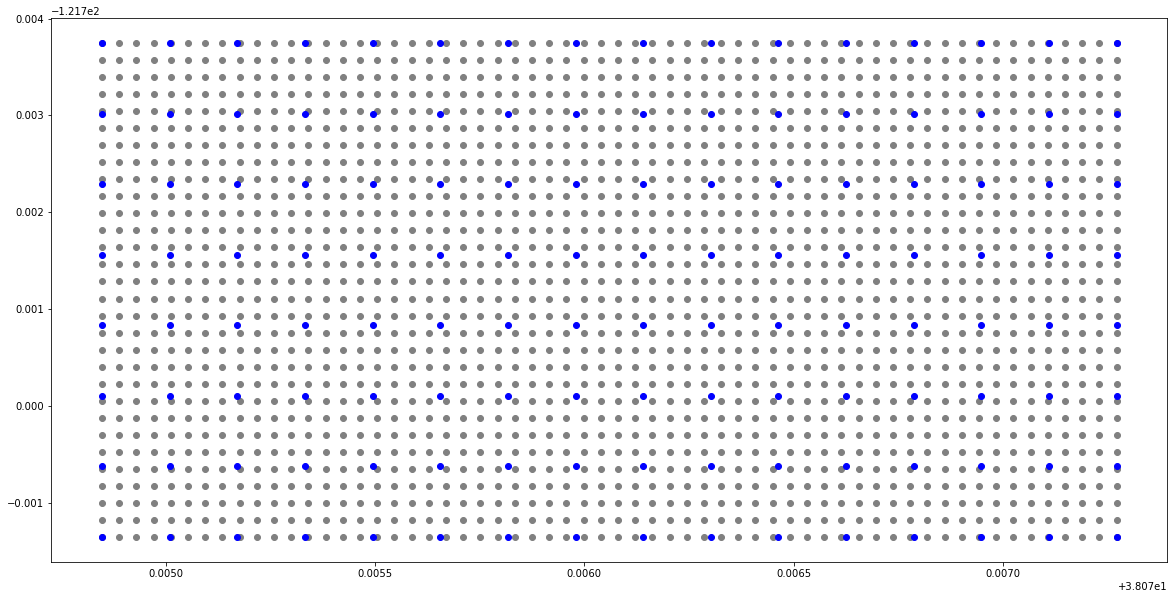

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(yeild_df.longitude,yeild_df.latitude,c='Grey')
plt.scatter(treatment_df.longitude,treatment_df.latitude,c='Blue')
plt.show()

In [9]:
diameter = (-treatment_df.iloc[0].latitude + treatment_df.iloc[1].latitude)
radius = diameter/2

0.0007294000000257483

In [10]:
import math
def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

In [11]:
def WaterRecived(r):
    w = 0
    for i, rr in treatment_df.iterrows():
        distance = calculateDistance(rr.longitude,
                                     rr.latitude,
                                     r.longitude,
                                     r.latitude) 
        if (distance< radius):
            w= w + rr.water * ((radius-distance)/radius)
    return w

In [12]:
yeild_df['water'] = yeild_df.apply(WaterRecived,axis=1)
yeild_df

,longitude,latitude,harvest,water
0,38.074847,-121.701356,557.540768,5.680732
1,38.074847,-121.701180,525.692767,5.870181
2,38.074847,-121.701004,543.489822,5.957548
3,38.074847,-121.700828,543.356496,5.947235
4,38.074847,-121.700652,547.939719,5.766486
...,...,...,...,...
1795,38.077272,-121.696954,3595.811304,6.966710
1796,38.077272,-121.696778,1530.069486,7.209086
1797,38.077272,-121.696602,1596.053265,7.263406
1798,38.077272,-121.696426,1330.986689,7.188093


In [1]:
yeild_df.plot(kind='scatter', x='water', y='harvest')

NameError: name 'yeild_df' is not defined

In [14]:
yeild_df.corr()

,longitude,latitude,harvest,water
longitude,1.000000e+00,-7.808517e-18,0.677197,0.359892
latitude,-7.808517e-18,1.000000e+00,-0.004515,0.043283
harvest,6.771974e-01,-4.515095e-03,1.000000,0.231056
water,3.598921e-01,4.328296e-02,0.231056,1.000000
